In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib
from itertools import zip_longest
import numpy.ma as ma
import random

In [ ]:
#Learning Mechanism

###Equation:
###$\frac{\mathrm{dP} }{\mathrm{d} t} = \frac{\beta [P]}{N}(N-P) + \gamma [P]$

*Where,*

*P = number of learnt parameters*

*Beta = learning rate*

*Gamma = forgetting rate*

*N = Total number of parameters*

*P0 = Initially known parameters at time = 0.*




In [2]:
#Adapted with permission (Luc Berthouze) from code provided for the Mathematics and Computational Methods for Complex Systems assessment (2021).

from random import expovariate # Generate variates from exponential distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def gillespie_ABA(N,P0,beta,gamma,Tmax):
    NP=[N-P0] #NP = Number of parameters not learnt.
    P=[P0] #P = Number of learnt parameters
    T=[0] #Time
    state = np.random.permutation([0]*(N-P0)+[1]*P0) #Current state of learnt (state=1) vs not-learnt (state=0) parameters
    P_contacts = np.where(state==1)[0] #Index of lerant parameters.
    rate_vector = (P0)*beta*np.ones((N,1))/N # Set rates to be P0*beta/N (rate for unlearnt parameters) to total parameters (initialisation). This means that unlearnt parameters can be learnt.
    rate_vector[P_contacts] = gamma # Update rate of P_contacts to be gamma (the rate for learnt parameters). This means learnt paramters can be forgotten. 
    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            tstep = expovariate(rate) # Pick an exponentially distributed time for stochasticity.
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which parameter will see its state change
            if state[event]==0: # Parameter is unlearnt
                NP.append(NP[-1]-1) # this unlearnt parameter becomes learnt so number of unlearnt parameters is decreased
                P.append(P[-1]+1) # Number of learnt parameters is increased 
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Update the rate vector as the newly lerant parameter can be forgotten
                NP_contacts = np.where(state==0)[0] # List unlearnt parameters after change
                rate_vector[NP_contacts] += beta/N # Update rate of unlearnt parameters to account for the newly learnt parameter.
            else: # individual is in state B
                P.append(P[-1]-1) # this learnt parameter is forgotten so number of learnt parameters is decreased
                NP.append(NP[-1]+1) # Number of unlearnt parameters is increased 
                state[event] = 0 # Update state vector
                NP_contacts = np.where(state==0)[0] # List unlearnt parameters after change                                
                rate_vector[NP_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of unlearnt parmeters based on number of learnt parameters.  
        else:
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                NP.append(NP[-1]) # Just keep things as they are
                P.append(P[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop
        time = T[-1]         
    return T,P

In [3]:
#Params
n = 100 #Number of parameters
tmax=100
num_moths=25
FullProbs=[]
ProbList=[]

for iter in range(10):
  Probs = []
  mothLst=[]
  for i in range(num_moths):
    beta = np.random.uniform(1,2) #Learning Rate
    gamma = np.random.uniform(0,0.7) #Forgetting Rate
    p_start = np.random.randint(2,4) #Some knowledge of maybe about leaves from larvae state.
    T,P = gillespie_ABA(n,p_start,beta,gamma,tmax)
    Probs.append(P[-1]/n)
  FullProbs.append(Probs)
ProbList.append(np.mean(FullProbs,axis=0))

In [4]:
ProbList

[array([0.815, 0.724, 0.782, 0.757, 0.738, 0.687, 0.763, 0.644, 0.806,
        0.728, 0.759, 0.721, 0.714, 0.648, 0.763, 0.753, 0.745, 0.696,
        0.73 , 0.637, 0.697, 0.685, 0.735, 0.726, 0.746])]

In [6]:
#Learning Tomato
selection_lst = ['Tomato', 'Tobacco']
selectedHost=[]
selectedHostNE=[]
TMcount = 0
TBcount = 0
TMcountNE = 0
TBcountNE = 0

for prob in ProbList[0]:
  probTM = prob
  probTB = (1-probTM)
  selectedHost.append(random.choices(selection_lst, weights=(probTM,probTB), k=1)[0])

for host in selectedHost:
  if host == "Tomato":
    TMcount+=1
  else:
    TBcount+=1

for i in range(num_moths):
  probTM = 0.5
  probTB = 0.5
  selectedHostNE.append(random.choices(selection_lst, weights=(probTM,probTB), k=1)[0])

for host in selectedHostNE:
  if host == "Tomato":
    TMcountNE+=1
  else:
    TBcountNE+=1
print("Proportion of tomato moths selecting tomaato",TMcount/num_moths)
print("Proportion of tomato moths selecting tobacco",TBcount/num_moths)
print("Proportion of no experience moths selecting tomato",TMcountNE/num_moths)
print("Proportion of no experience moths selecting tobacco",TBcountNE/num_moths)

Proportion of tomato moths selecting tomaato 0.76
Proportion of tomato moths selecting tobacco 0.24
Proportion of no experience moths selecting tomato 0.56
Proportion of no experience moths selecting tobacco 0.44


In [121]:
#Learning Tobacco
selection_lst = ['Tomato', 'Tobacco']
selectedHost=[]
selectedHostNE=[]
TMcount = 0
TBcount = 0
TMcountNE = 0
TBcountNE = 0

for prob in ProbList[0]:
  probTB = prob
  probTM = (1-probTB)
  selectedHost.append(random.choices(selection_lst, weights=(probTM,probTB), k=1)[0])

for host in selectedHost:
  if host == "Tomato":
    TMcount+=1
  else:
    TBcount+=1

for i in range(num_moths):
  probTM = 0.5
  probTB = 0.5
  selectedHostNE.append(random.choices(selection_lst, weights=(probTM,probTB), k=1)[0])

for host in selectedHostNE:
  if host == "Tomato":
    TMcountNE+=1
  else:
    TBcountNE+=1
print("Proportion of tobacco moths selecting tobacco",TBcount/num_moths)
print("Proportion of tobacco moths selecting tomato",TMcount/num_moths)
print("Proportion of no experience moths selecting tomato",TMcountNE/num_moths)
print("Proportion of no experience moths selecting tobacco",TBcountNE/num_moths)

Proportion of tobacco moths selecting tobacco 0.7407407407407407
Proportion of tobacco moths selecting tomato 0.25925925925925924
Proportion of no experience moths selecting tomato 0.6296296296296297
Proportion of no experience moths selecting tobacco 0.37037037037037035


In [116]:
#Run After Learning Tomato
TMSelectedTM = TMcount/num_moths
NESelectedTM = TMcountNE/num_moths

In [122]:
#Run After Learning Tobacco
TBSelectedTM = TMcount/num_moths

In [132]:
hosts = ["Tobacco (27)","Tomato (22)","No host (25)"]
results = [TBSelectedTM,TMSelectedTM,NESelectedTM]

<BarContainer object of 3 artists>

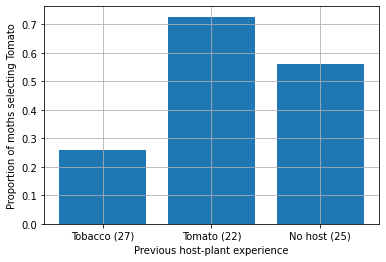

In [133]:
plt.grid(which='major')
plt.xlabel("Previous host-plant experience")
plt.ylabel("Proportion of moths selecting Tomato")
plt.bar(hosts,results)

In [ ]:
#Analysis of Learning Process and Differential Equation

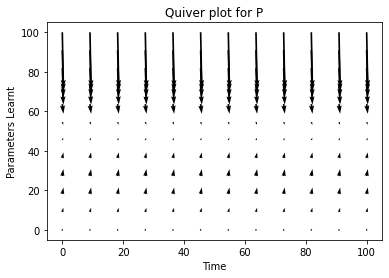

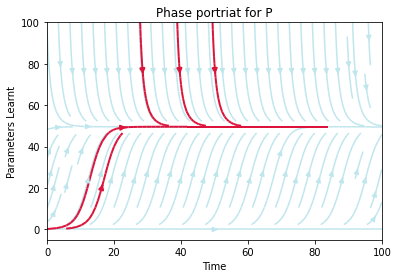

In [185]:
# If learning rate > forgetting rate
beta = 1.0
gamma = 0.5
n = 100

# The quiver approach for P
t,p = np.linspace(0,100,12),np.linspace(0,100,12)
T,P = np.meshgrid(t,p)
#print("y",Y)
Ub = np.ones(np.shape(T)) # derivative of t is 1
Vp = (beta*P*(n-P))/n - gamma*(P)
#print("v",V)
plt.quiver(T,P,Ub,Vp)
plt.title("Quiver plot for P")
plt.xlabel("Time")
plt.ylabel("Parameters Learnt")
plt.show()

# The streamplot approach for P
start = [[10,10],[20,40],[30,60],[40,70],[50,80]]
# start = [[1,1], [100,100], [200,200], [600,600]] # Some sample starting positions
fig0, ax0 = plt.subplots()
strm = ax0.streamplot(T,P, Ub, Vp, color=(.75,.90,.93))
strmS = ax0.streamplot(T,P, Ub, Vp, start_points=start, color="crimson", linewidth=2)
plt.title("Phase portriat for P")
plt.xlabel("Time")
plt.ylabel("Parameters Learnt")
plt.show()

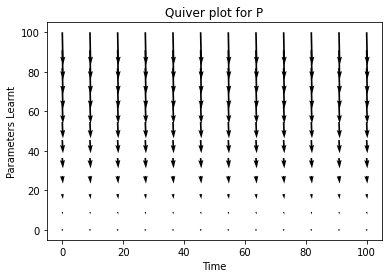

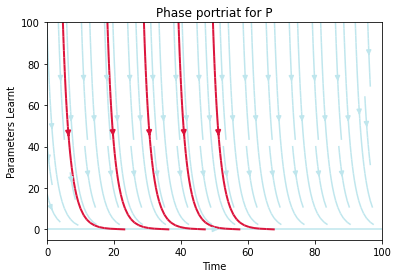

In [186]:
# If learning rate < forgetting rate
beta = 0.1
gamma = 0.5
n = 100

# The quiver approach for P
t,p = np.linspace(0,100,12),np.linspace(0,100,12)
T,P = np.meshgrid(t,p)
#print("y",Y)
Ub = np.ones(np.shape(T)) # derivative of t is 1
Vp = (beta*P*(n-P))/n - gamma*(P)
#print("v",V)
plt.quiver(T,P,Ub,Vp)
plt.title("Quiver plot for P")
plt.xlabel("Time")
plt.ylabel("Parameters Learnt")
plt.show()

# The streamplot approach for P
start = [[10,10],[20,40],[30,60],[40,70],[50,80]]
# start = [[1,1], [100,100], [200,200], [600,600]] # Some sample starting positions
fig0, ax0 = plt.subplots()
strm = ax0.streamplot(T,P, Ub, Vp, color=(.75,.90,.93))
strmS = ax0.streamplot(T,P, Ub, Vp, start_points=start, color="crimson", linewidth=2)
plt.title("Phase portriat for P")
plt.xlabel("Time")
plt.ylabel("Parameters Learnt")
plt.show()

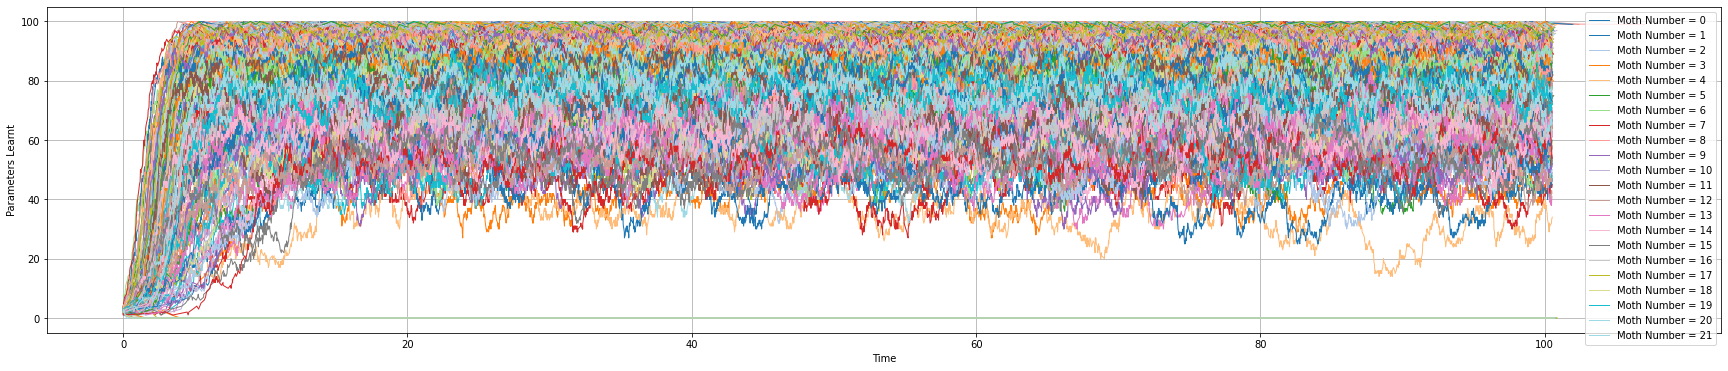

In [182]:
#Params
n = 100 #Number of parameters
tmax=100
num_moths=22
colors = plt.cm.tab20(np.linspace(0, 1, num_moths))
fig,ax=plt.subplots(1,1,figsize=(30,6))
ax.set_xlabel("Time")
ax.set_ylabel("Parameters Learnt")
ax.grid()
for iter in range(10):
  for i in range(num_moths):
    beta = np.random.uniform(1,2) #Learning Rate
    gamma = np.random.uniform(0,0.7) #Forgetting Rate
    p_start = np.random.randint(2,4) #Some knowledge of maybe about leaves from larvae state.
    T,P = gillespie_ABA(n,p_start,beta,gamma,tmax)
    if (iter==0):
      ax.plot(T, P, linewidth=1, color=colors[i], label="Moth Number = "+str(i))
    else:
      ax.plot(T, P, linewidth=1, color=colors[i])
ax.legend(loc='best')

In [ ]:
#Hypothetical 3rd Situation

In [35]:
#Learning Tomato
selection_lst = ['Tomato', 'Tobacco','Apple']
selectedHost=[]
selectedHostNE=[]
TMcount = 0
TBcount = 0
TAcount = 0
TMcountNE = 0
TBcountNE = 0
TAcountNE = 0

for prob in ProbList[0]:
  probTM = prob
  probTB = (1-probTM)
  selectedHost.append(random.choices(selection_lst, weights=(probTM,probTB,probTB), k=1)[0])

for host in selectedHost:
  if host == "Tomato":
    TMcount+=1
  elif host == "Apple":
    TAcount+=1
  else:
    TBcount+=1

for i in range(num_moths):
  probTM = 0.5
  probTB = 0.5
  selectedHostNE.append(random.choices(selection_lst, weights=(probTM,probTB,probTB), k=1)[0])

for host in selectedHostNE:
  if host == "Tomato":
    TMcountNE+=1
  elif host == "Apple":
    TAcountNE+=1
  else:
    TBcountNE+=1
print("Proportion of tomato moths selecting tomaato",TMcount/num_moths)
print("Proportion of tomato moths selecting tobacco",TBcount/num_moths)
print("Proportion of tomato moths selecting Apple",TAcount/num_moths)
print("Proportion of no experience moths selecting tomato",TMcountNE/num_moths)
print("Proportion of no experience moths selecting tobacco",TBcountNE/num_moths)
print("Proportion of no experience moths selecting Apple",TAcountNE/num_moths)

Proportion of tomato moths selecting tomaato 0.6
Proportion of tomato moths selecting tobacco 0.2
Proportion of tomato moths selecting Apple 0.2
Proportion of no experience moths selecting tomato 0.36
Proportion of no experience moths selecting tobacco 0.24
Proportion of no experience moths selecting Apple 0.4
